In [1]:
import pandas as pd

media_transcriptos = pd.read_csv('MediaTodosTranscriptos.csv')

all_transcripts = pd.read_csv('AllTranscripts.csv')

proteinas = pd.read_csv('TablaProteinas.csv')

act_enz = pd.read_csv('ActividadEnzimatica.csv')

metab = pd.read_csv('metabolitos.csv')

print(media_transcriptos.shape , all_transcripts.shape , proteinas.shape , act_enz.shape , metab.shape)

(19248, 13) (19248, 25) (424, 25) (26, 25) (26, 26)


In [16]:
#vamos a arrancar con cada dataset por separado, generando un pca y un knn para cada dataset, discriminando
#por estadio celular, para validar el tema del num de genotipos, y que entre ellos sean distintos
media_transcriptos.columns

Index(['Locus', 'CervilMean', 'LevovilMean', 'FerumMean', 'LA1420Mean',
       'PlovdivMean', 'LA0147Mean', 'SPRMean', 'CriolloMean',
       'FerumxLA1420Mean', 'CervilxLevovilMean', 'SPRxCriollo',
       'LA0147xPlovdiv'],
      dtype='object')

In [2]:
media_transcriptos = media_transcriptos.loc[: , ['CervilMean', 'LevovilMean', 'FerumMean', 'LA1420Mean',
'PlovdivMean', 'LA0147Mean','FerumxLA1420Mean', 'CervilxLevovilMean','LA0147xPlovdiv']]

In [18]:
media_transcriptos

,CervilMean,LevovilMean,FerumMean,LA1420Mean,PlovdivMean,LA0147Mean,FerumxLA1420Mean,CervilxLevovilMean,LA0147xPlovdiv
0,28.492240,37.842904,22.362841,33.497084,20.199535,25.653553,14.061612,33.370647,21.379897
1,23.788539,39.415068,32.367191,38.152594,31.259668,40.849439,25.980639,29.144475,31.566601
2,190.270861,202.485253,135.372770,204.731228,128.395849,114.971221,166.770359,194.514185,127.440662
3,20.341800,14.456985,24.443495,16.523091,24.578072,21.474084,24.512475,15.108102,22.722442
4,17.343025,14.094959,4.591615,7.236849,11.458846,12.092857,6.367684,13.322762,11.479487
...,...,...,...,...,...,...,...,...,...
19243,0.000000,3.943561,2.736839,3.342046,0.032568,3.821104,3.314712,1.959368,1.626370
19244,72.878382,48.812501,113.020736,42.075091,81.266034,69.342089,86.876210,52.671197,73.164069
19245,0.000000,0.000000,0.194430,0.224818,0.650277,0.440910,0.060884,0.148837,0.765429
19246,0.150369,0.504333,0.336654,0.927120,0.134418,0.221020,0.898132,0.543392,0.188897


In [19]:
media_transcriptos.T

,0,1,2,3,4,5,6,7,8,9,...,19238,19239,19240,19241,19242,19243,19244,19245,19246,19247
CervilMean,28.492240,23.788539,190.270861,20.341800,17.343025,12.722341,19.617464,0.424791,38.975900,19.870831,...,882.184313,1.851060,34.657836,1.151966,247.626103,0.000000,72.878382,0.000000,0.150369,1.435428
LevovilMean,37.842904,39.415068,202.485253,14.456985,14.094959,15.563449,19.111693,0.340635,43.410143,19.025062,...,730.159293,1.443004,28.677239,0.000000,277.895400,3.943561,48.812501,0.000000,0.504333,0.087741
FerumMean,22.362841,32.367191,135.372770,24.443495,4.591615,17.022573,22.966607,0.424924,32.013142,26.593905,...,941.639692,2.837479,109.097142,0.000000,323.800211,2.736839,113.020736,0.194430,0.336654,0.166685
LA1420Mean,33.497084,38.152594,204.731228,16.523091,7.236849,10.508899,14.881177,0.177670,44.887991,23.775856,...,900.435712,1.818349,78.709506,0.000000,284.121476,3.342046,42.075091,0.224818,0.927120,0.136844
PlovdivMean,20.199535,31.259668,128.395849,24.578072,11.458846,14.867246,20.411920,0.316306,25.132419,26.399616,...,895.560829,2.799575,59.871055,0.000000,203.125954,0.032568,81.266034,0.650277,0.134418,0.457631
LA0147Mean,25.653553,40.849439,114.971221,21.474084,12.092857,19.688495,12.160373,0.502150,30.927041,24.891183,...,1326.846802,3.464191,48.531566,0.000000,207.850006,3.821104,69.342089,0.440910,0.221020,0.115432
FerumxLA1420Mean,14.061612,25.980639,166.770359,24.512475,6.367684,9.905629,17.020599,0.282441,39.491317,23.773590,...,829.294918,3.270480,104.862588,0.000000,347.949653,3.314712,86.876210,0.060884,0.898132,0.097414
CervilxLevovilMean,33.370647,29.144475,194.514185,15.108102,13.322762,13.368676,16.509039,0.357428,43.001902,20.462443,...,350.587893,1.339429,36.090875,0.378256,319.080374,1.959368,52.671197,0.148837,0.543392,0.098680
LA0147xPlovdiv,21.379897,31.566601,127.440662,22.722442,11.479487,18.187961,19.407490,0.226587,29.202785,27.621993,...,1196.274219,3.432103,46.482787,0.172401,200.209688,1.626370,73.164069,0.765429,0.188897,0.817352


In [3]:
genotipo = media_transcriptos.T.index

In [4]:
#voy a importar librerias que me hacen falta para hacer los graficos, y modelos
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_media_transcriptos = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_media_transcriptos = pca_media_transcriptos.fit(media_transcriptos.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_media_transcriptos = fitting_media_transcriptos.transform(media_transcriptos.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_media_transcriptos = pd.DataFrame(data = comp_princ_media_transcriptos , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_media_transcriptos['Genotipo'] = genotipo

df_comp_princ_media_transcriptos.shape

(9, 3)

In [5]:
print(pca_media_transcriptos.explained_variance_ratio_[1]*100)

25.930262574933653


In [6]:
print(pca_media_transcriptos.explained_variance_ratio_[0]*100)

49.77254639037862


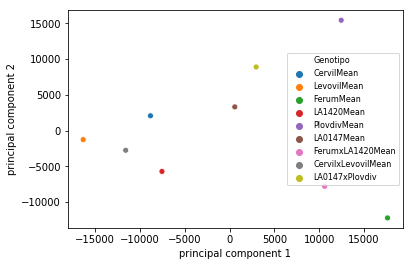

In [6]:
#ahora hay que graficarlo

#comp1  (49.77%) , comp2  (25.93%)
import seaborn as sns
ax = sns.scatterplot(data = df_comp_princ_media_transcriptos , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
ax.legend(fontsize='8')

comp1: 47.00814147640752 comp2: 24.09959923742621


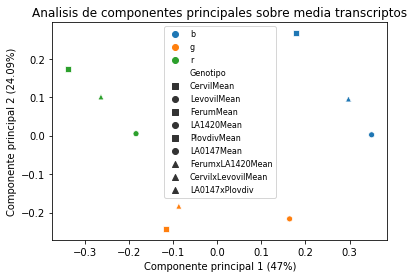

In [17]:
#quiero hacer lo mismo, pero con datos normalizados

#from matplotlib import markers as mark

from sklearn import preprocessing

media_transcriptos_norm = preprocessing.normalize(media_transcriptos, axis=0)

pca_media_transcriptos_norm = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_media_transcriptos_norm = pca_media_transcriptos_norm.fit(media_transcriptos_norm.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_media_transcriptos_norm = fitting_media_transcriptos_norm.transform(media_transcriptos_norm.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_media_transcriptos_norm = pd.DataFrame(data = comp_princ_media_transcriptos_norm , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_media_transcriptos_norm['Genotipo'] = genotipo

print(f'comp1: {pca_media_transcriptos_norm.explained_variance_ratio_[0]*100} comp2: {pca_media_transcriptos_norm.explained_variance_ratio_[1]*100}')

#df_comp_princ_media_transcriptos_norm.shape

ax = sns.scatterplot(data = df_comp_princ_media_transcriptos_norm , x = 'principal component 1' , y = 'principal component 2' , 
hue = ['b' , 'b' , 'g' , 'g' , 'r' , 'r' , 'g' , 'b' , 'r'] , style = 'Genotipo' , markers = ["s" , "o" , "s" , "o" ,"s" , "o" , "^" , "^" , "^"])

ax.legend(fontsize='8')

#ax.figsize(10)

#ax.xlabel('Componente principal 1 (47%)')

#ax.ylabel('Componente principal 2 (24.09%)')

ax.set(title='Analisis de componentes principales sobre media transcriptos',xlabel = 'Componente principal 1 (47%)' , ylabel = 'Componente principal 2 (24.09%)')

plt.savefig('/home/mariano/Documents/tomate/A2B2C2023/imagenes_poster/AnalisisComponentesPrincipalesMediaTranscriptos.png')

In [23]:
#vamos a hacerl o mismo para all_transcripts

In [24]:
all_transcripts.columns

Index(['Locus', 'Cervil_A', 'Cervil_B', 'Levovil_A', 'Levovil_B', 'Ferum_A',
       'Ferum_B', 'LA1420_A', 'LA1420_B', 'Plovdiv_A', 'Plovdiv_B', 'LA0147_A',
       'LA0147_B', 'Stupicke_A', 'Stupicke_B', 'Criollo_A', 'Criollo_B',
       'FerumXLA1420_A', 'FerumXLA1420_B', 'CervilXLevovil_A',
       'CervilXLevovil_B', 'StupickeXCriollo_A', 'StupickeXCriollo_B',
       'LA0147XPlovdiv_A', 'LA0147XPlovdiv_B'],
      dtype='object')

In [10]:
all_transcripts = all_transcripts.loc[: , ['Cervil_A', 'Cervil_B', 'Levovil_A', 'Levovil_B', 'Ferum_A',
       'Ferum_B', 'LA1420_A', 'LA1420_B', 'Plovdiv_A', 'Plovdiv_B', 'LA0147_A',
       'LA0147_B', 'FerumXLA1420_A', 'FerumXLA1420_B', 'CervilXLevovil_A',
       'CervilXLevovil_B', 'LA0147XPlovdiv_A', 'LA0147XPlovdiv_B']]

In [26]:
#all_transcripts = all_transcripts.iloc[: , 1:]

In [11]:
genotipo_all = all_transcripts.T.index

In [12]:
pca_all_transcripts = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_all_transcripts = pca_all_transcripts.fit(all_transcripts.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_all_transcripts = fitting_all_transcripts.transform(all_transcripts.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_all_transcripts = pd.DataFrame(data = comp_princ_all_transcripts , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_all_transcripts['Genotipo'] = genotipo_all

df_comp_princ_all_transcripts.shape

(18, 3)

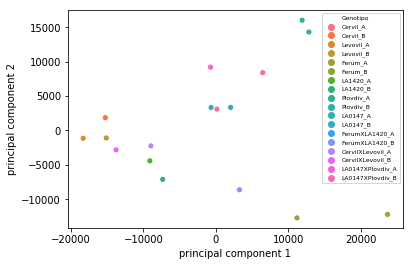

In [13]:
#grafico
ax = sns.scatterplot(data = df_comp_princ_all_transcripts , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
sns.color_palette("icefire")
ax.legend(fontsize='6')

In [30]:
df_comp_princ_all_transcripts

,principal component 1,principal component 2,Genotipo
0,131.747592,3107.602933,Cervil_A
1,-15247.608068,1853.034665,Cervil_B
2,-18305.541720,-1139.886788,Levovil_A
3,-15116.933147,-1096.279626,Levovil_B
4,23674.579489,-12203.941543,Ferum_A
5,11179.385905,-12718.628531,Ferum_B
6,-9106.333794,-4416.800345,LA1420_A
7,-7337.138052,-7111.635511,LA1420_B
8,11897.450918,16024.027198,Plovdiv_A
9,12831.835819,14310.252913,Plovdiv_B


In [29]:
#ahora viene proteinas
proteinas.columns

Index(['spotID', 'CervilCEMean', 'CervilORMean', 'LevovilxCervilCEMean',
       'LevovilxCervilORMean', 'LevovilCEMean', 'LevovilORMean',
       'CriolloCEMean', 'CriolloORMean', 'SPRxCriolloCEMean',
       'SPRxCriolloORMean', 'SPRCEMean', 'SPRORMean', 'PlovdivCEMean',
       'PlovdivORMean', 'LA0147xPlovdivCEMean', 'LA0147xPlovdivORMean',
       'LA0147CEMean', 'LA0147ORMean', 'LA1420CEMean', 'LA1420ORMean',
       'FerumxLA1420CEMean', 'FerumxLA1420ORMean', 'FerumCEMean',
       'FerumORMean'],
      dtype='object')

In [18]:
p_CE = proteinas.loc[: , ['CervilCEMean','LevovilxCervilCEMean','LevovilCEMean','PlovdivCEMean',
'LA0147xPlovdivCEMean','LA0147CEMean','LA1420CEMean','FerumxLA1420CEMean','FerumCEMean']]

p_OR = proteinas.loc[: , ['CervilORMean','LevovilxCervilORMean','LevovilORMean','PlovdivORMean',
'LA0147xPlovdivORMean','LA0147ORMean','LA1420ORMean','FerumxLA1420ORMean','FerumORMean']]

In [19]:
genotipo_CE = p_CE.T.index

genotipo_OR = p_OR.T.index

In [16]:
pca_p_CE = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_p_CE = pca_p_CE.fit(p_CE.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_p_CE = fitting_p_CE.transform(p_CE.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_p_CE = pd.DataFrame(data = comp_princ_p_CE , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_p_CE['Genotipo'] = genotipo_CE

df_comp_princ_p_CE.shape

(9, 3)

In [17]:
pca_p_OR = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_p_OR = pca_p_OR.fit(p_OR.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_p_OR = fitting_p_OR.transform(p_OR.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_p_OR = pd.DataFrame(data = comp_princ_p_OR , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_p_OR['Genotipo'] = genotipo_OR

df_comp_princ_p_OR.shape

(9, 3)

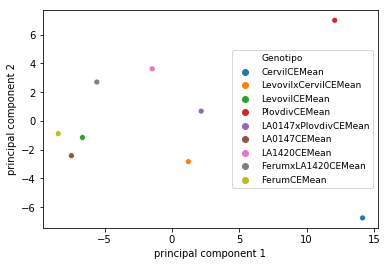

In [18]:
#grafico CE
ax = sns.scatterplot(data = df_comp_princ_p_CE , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
sns.color_palette("icefire")
ax.legend(fontsize='9')

comp1: 61.65843028124202  comp2: 14.3624404665949


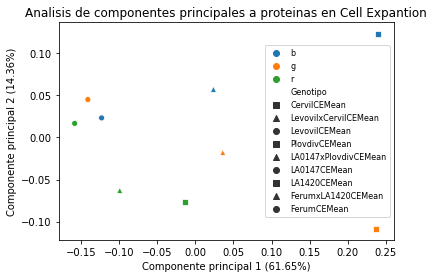

In [23]:
#P_CE normalizado

p_CE_norm = preprocessing.normalize(p_CE, axis=0)

pca_p_CE_norm = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_p_CE_norm = pca_p_CE_norm.fit(p_CE_norm.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_pca_p_CE_norm = fitting_p_CE_norm.transform(p_CE_norm.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_pca_p_CE_norm = pd.DataFrame(data = comp_princ_pca_p_CE_norm , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_pca_p_CE_norm['Genotipo'] = genotipo_CE

print(f'comp1: {pca_p_CE_norm.explained_variance_ratio_[0]*100}  comp2: {pca_p_CE_norm.explained_variance_ratio_[1]*100}')

ax = sns.scatterplot(data = df_comp_princ_pca_p_CE_norm , x = 'principal component 1' , y = 'principal component 2' , 
hue = ['b' , 'b' , 'b' ,'g' , 'g' , 'g' ,'r' , 'r' , 'r'] , style = 'Genotipo' , markers = ["s" , "^" , "o" , "s" , "^" , "o" ,"s" , "^" , "o"])

ax.legend(fontsize='8')

ax.set(title='Analisis de componentes principales a proteinas en Cell Expantion',xlabel = 'Componente principal 1 (61.65%)' , ylabel = 'Componente principal 2 (14.36%)')

plt.savefig('/home/mariano/Documents/tomate/A2B2C2023/imagenes_poster/AnalisisComponentesPrincipalesProteinasCE.png')

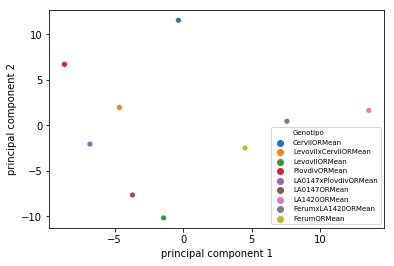

In [24]:
#grafico OR
ax = sns.scatterplot(data = df_comp_princ_p_OR , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
sns.color_palette("icefire")
ax.legend(fontsize='7')

comp1: 29.289972007050746  comp2: 25.11954600679283


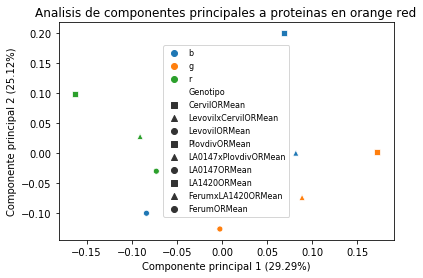

In [26]:
#P_OR normalizado

p_OR_norm = preprocessing.normalize(p_OR, axis=0)

pca_p_OR_norm = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_p_OR_norm = pca_p_OR_norm.fit(p_OR_norm.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_pca_p_OR_norm = fitting_p_OR_norm.transform(p_OR_norm.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_pca_p_OR_norm = pd.DataFrame(data = comp_princ_pca_p_OR_norm , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_pca_p_OR_norm['Genotipo'] = genotipo_OR

print(f'comp1: {pca_p_OR_norm.explained_variance_ratio_[0]*100}  comp2: {pca_p_OR_norm.explained_variance_ratio_[1]*100}')

ax = sns.scatterplot(data = df_comp_princ_pca_p_OR_norm , x = 'principal component 1' , y = 'principal component 2' , 
hue = ['b' , 'b' , 'b' ,'g' , 'g' , 'g' ,'r' , 'r' , 'r'] , style = 'Genotipo' , markers = ["s" , "^" , "o" , "s" , "^" , "o" ,"s" , "^" , "o"])

ax.legend(fontsize='8')

ax.set(title='Analisis de componentes principales a proteinas en orange red', xlabel = 'Componente principal 1 (29.29%)' , ylabel = 'Componente principal 2 (25.12%)')

plt.savefig('/home/mariano/Documents/tomate/A2B2C2023/imagenes_poster/AnalisisComponentesPrincipalesProteinasOR.png')

In [38]:
#seguimos con act_enz

In [39]:
act_enz.columns

Index(['enzima', 'CervilMeanCE', 'CervilMeanOR', 'LevovilxCervilMeanCE',
       'LevovilxCervilMeanOR', 'LevovilMeanCE', 'LevovilMeanOR',
       'CriolloMeanCE', 'CriolloMeanOR', 'SPRxCriolloMeanCE',
       'SPRxCriolloMeanOR', 'SPRMeanCE', 'SPRMeanOR', 'PlovdivMeanCE',
       'PlovdivMeanOR', 'LA0147xPlovdivMeanCE', 'LA0147xPlovdivMeanOR',
       'LA0147MeanCE', 'LA0147MeanOR', 'LA1420MeanCE', 'LA1420MeanOR',
       'FerumxLA1420MeanCE', 'FerumxLA1420MeanOR', 'FerumMeanCE',
       'FerumMeanOR'],
      dtype='object')

In [27]:
AE_CE = act_enz.loc[: , ['CervilMeanCE', 'LevovilxCervilMeanCE','LevovilMeanCE','PlovdivMeanCE',
'LA0147xPlovdivMeanCE','LA0147MeanCE','LA1420MeanCE','FerumxLA1420MeanCE','FerumMeanCE']]

AE_OR = act_enz.loc[: , ['CervilMeanOR', 'LevovilxCervilMeanOR','LevovilMeanOR','PlovdivMeanOR',
'LA0147xPlovdivMeanOR','LA0147MeanOR','LA1420MeanOR','FerumxLA1420MeanOR','FerumMeanOR']]

In [28]:
genotipo_AE_CE = AE_CE.T.index

genotipo_AE_OR = AE_OR.T.index

In [45]:
pca_AE_CE = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_AE_CE = pca_AE_CE.fit(AE_CE.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_AE_CE = fitting_AE_CE.transform(AE_CE.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_AE_CE = pd.DataFrame(data = comp_princ_AE_CE , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_AE_CE['Genotipo'] = genotipo_AE_CE

df_comp_princ_AE_CE.shape

(9, 3)

In [46]:
pca_AE_OR = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_AE_OR = pca_AE_OR.fit(AE_OR.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_AE_OR = fitting_AE_OR.transform(AE_OR.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_AE_OR = pd.DataFrame(data = comp_princ_AE_OR , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_AE_OR['Genotipo'] = genotipo_AE_OR

df_comp_princ_AE_OR.shape

(9, 3)

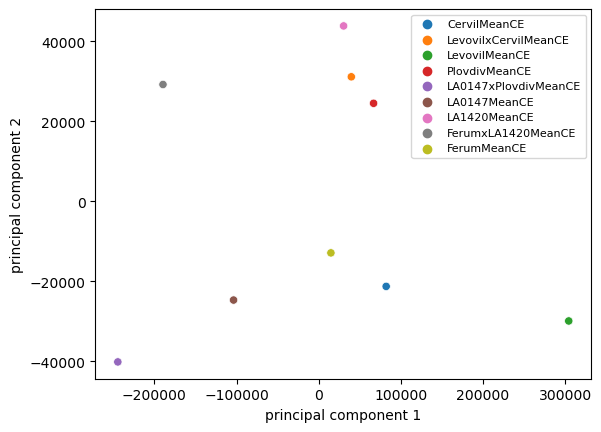

In [47]:
#a graficar CE

ax = sns.scatterplot(data = df_comp_princ_AE_CE , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
sns.color_palette("icefire")
ax.legend(fontsize='8')

Comp1: 74.61861844449554 Comp2: 15.720435109575389


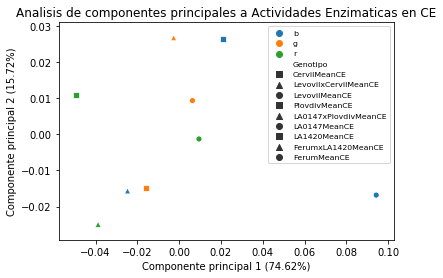

In [42]:
#normalizado AE_CE

AE_CE_norm = preprocessing.normalize(AE_CE, axis=0)

pca_AE_CE_norm = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_AE_CE_norm = pca_AE_CE_norm.fit(AE_CE_norm.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_AE_CE_norm = fitting_AE_CE_norm.transform(AE_CE_norm.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_AE_CE_norm = pd.DataFrame(data = comp_princ_AE_CE_norm , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_AE_CE_norm['Genotipo'] = genotipo_AE_CE

print(f'Comp1: {pca_AE_CE_norm.explained_variance_ratio_[0]*100} Comp2: {pca_AE_CE_norm.explained_variance_ratio_[1]*100}')

ax = sns.scatterplot(data = df_comp_princ_AE_CE_norm , x = 'principal component 1' , y = 'principal component 2' , 
hue = ['b' , 'b' , 'b' ,'g' , 'g' , 'g' ,'r' , 'r' , 'r'] , style = 'Genotipo' , markers = ["s" , "^" , "o" , "s" , "^" , "o" ,"s" , "^" , "o"])

ax.legend(fontsize='7.8')

ax.set(title='Analisis de componentes principales a Actividades Enzimaticas en CE', xlabel ='Componente principal 1 (74.62%)' , ylabel='Componente principal 2 (15.72%)')

plt.savefig('/home/mariano/Documents/tomate/A2B2C2023/imagenes_poster/AnalisisComponentesPrincipalesActividadesEnzimaticasCE.png')

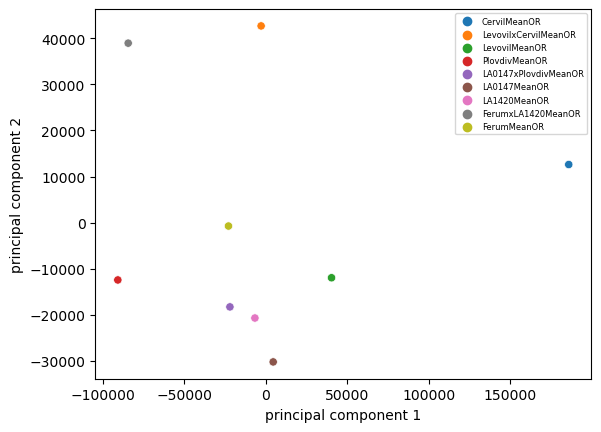

In [48]:
#a graficar OR

ax = sns.scatterplot(data = df_comp_princ_AE_OR , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
sns.color_palette("icefire")
ax.legend(fontsize='6')

comp1: 59.91199672704764 Comp2: 23.432033852550617


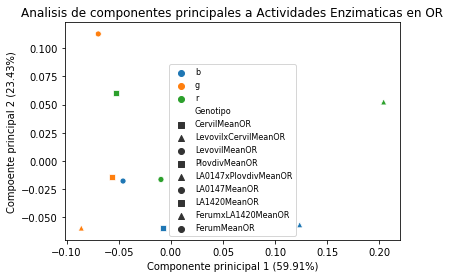

In [41]:
#normalizado AE_OR

AE_OR_norm = preprocessing.normalize(AE_OR, axis=0)

pca_AE_OR_norm = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_AE_OR_norm = pca_AE_OR_norm.fit(AE_OR_norm.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_AE_OR_norm = fitting_AE_OR_norm.transform(AE_OR_norm.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_AE_OR_norm = pd.DataFrame(data = comp_princ_AE_OR_norm , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_AE_OR_norm['Genotipo'] = genotipo_AE_OR

print(f'comp1: {pca_AE_OR_norm.explained_variance_ratio_[0]*100} Comp2: {100*pca_AE_OR_norm.explained_variance_ratio_[1]}')

ax = sns.scatterplot(data = df_comp_princ_AE_OR_norm , x = 'principal component 1' , y = 'principal component 2' , 
hue = ['b' , 'b' , 'b' ,'g' , 'g' , 'g' ,'r' , 'r' , 'r'] , style = 'Genotipo' , markers = ["s" , "^" , "o" , "s" , "^" , "o" ,"s" , "^" , "o"])

ax.legend(fontsize='8')

ax.set(title='Analisis de componentes principales a Actividades Enzimaticas en OR', xlabel='Componente prinicipal 1 (59.91%)' , ylabel='Compoente principal 2 (23.43%)')

plt.savefig('/home/mariano/Documents/tomate/A2B2C2023/imagenes_poster/AnalisisComponentesPrincipalesActividadesEnzimaticasOR.png')

In [46]:
#ahora queda la de metabolitos

In [60]:
metab.columns

Index(['metabolito', 'tipo', 'CervilMeanCE', 'CervilMeanOR',
       'LevovilxCervilMeanCE', 'LevovilxCervilMeanOR', 'LevovilMeanCE',
       'LevovilMeanOR', 'CriolloMeanCE', 'CriolloMeanOR', 'SPRxCriolloMeanCE',
       'SPRxCriolloMeanOR', 'SPRMeanCE', 'SPRMeanOR', 'PlovdivMeanCE',
       'PlovdivMeanOR', 'LA0147xPlovdivMeanCE', 'LA0147xPlovdivMeanOR',
       'LA0147MeanCE', 'LA0147MeanOR', 'LA1420MeanCE', 'LA1420MeanOR',
       'FerumxLA1420MeanCE', 'FerumxLA1420MeanOR', 'FerumMeanCE',
       'FerumMeanOR'],
      dtype='object')

In [43]:
metab_CE = metab.loc[: , ['CervilMeanCE','LevovilxCervilMeanCE','LevovilMeanCE','PlovdivMeanCE',
'LA0147xPlovdivMeanCE','LA0147MeanCE', 'LA1420MeanCE','FerumxLA1420MeanCE','FerumMeanCE']]

metab_OR = metab.loc[: , ['CervilMeanOR','LevovilxCervilMeanOR','LevovilMeanOR','PlovdivMeanOR',
'LA0147xPlovdivMeanOR','LA0147MeanOR', 'LA1420MeanOR','FerumxLA1420MeanOR','FerumMeanOR']]

In [44]:
genotipos_met_CE = metab_CE.T.index

genotipos_met_OR = metab_OR.T.index

In [56]:
pca_met_CE = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_met_CE = pca_met_CE.fit(metab_CE.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_met_CE = fitting_met_CE.transform(metab_CE.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_met_CE = pd.DataFrame(data = comp_princ_met_CE , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_met_CE['Genotipo'] = genotipos_met_CE

df_comp_princ_met_CE.shape

(9, 3)

In [57]:
pca_met_OR = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_met_OR = pca_met_OR.fit(metab_OR.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_met_OR = fitting_met_OR.transform(metab_OR.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_met_OR = pd.DataFrame(data = comp_princ_met_OR , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_met_OR['Genotipo'] = genotipos_met_OR

df_comp_princ_met_OR.shape

(9, 3)

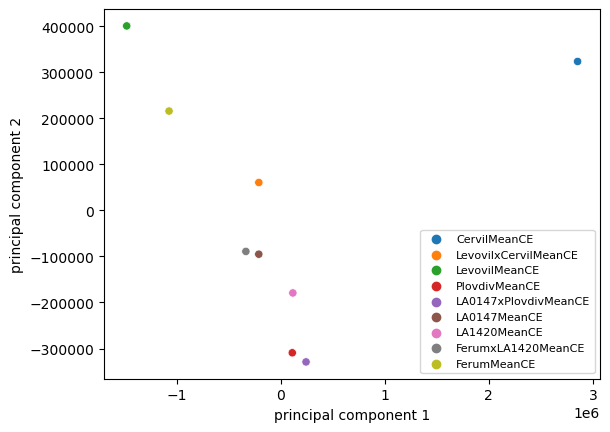

In [58]:
#a graficar CE

ax = sns.scatterplot(data = df_comp_princ_met_CE , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
sns.color_palette("icefire")
ax.legend(fontsize='8')

Comp1: 79.15184566380653 Comp2: 19.183747757912926


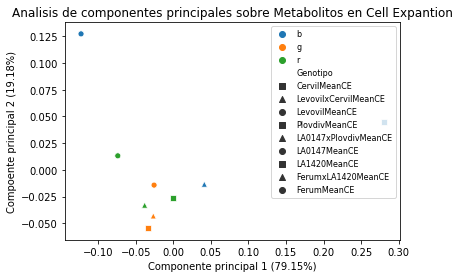

In [46]:
###met_CE normalizado

metab_CE_norm = preprocessing.normalize(metab_CE, axis=0)

pca_metab_CE_norm = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_metab_CE_norm = pca_metab_CE_norm.fit(metab_CE_norm.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_metab_CE_norm = fitting_metab_CE_norm.transform(metab_CE_norm.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_metab_CE_norm = pd.DataFrame(data = comp_princ_metab_CE_norm , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_metab_CE_norm['Genotipo'] = genotipos_met_CE

print(f'Comp1: {pca_metab_CE_norm.explained_variance_ratio_[0]*100} Comp2: {100*pca_metab_CE_norm.explained_variance_ratio_[1]}')

ax = sns.scatterplot(data = df_comp_princ_metab_CE_norm , x = 'principal component 1' , y = 'principal component 2' , 
hue = ['b' , 'b' , 'b' ,'g' , 'g' , 'g' ,'r' , 'r' , 'r'] , style = 'Genotipo' , markers = ["s" , "^" , "o" , "s" , "^" , "o" ,"s" , "^" , "o"])

ax.legend(fontsize='8')

ax.set(title='Analisis de componentes principales sobre Metabolitos en Cell Expantion',xlabel='Componente principal 1 (79.15%)' ,ylabel='Compoente principal 2 (19.18%)')

plt.savefig('/home/mariano/Documents/tomate/A2B2C2023/imagenes_poster/AnalisisComponentesPrincipalesMetabolitosCE.png')

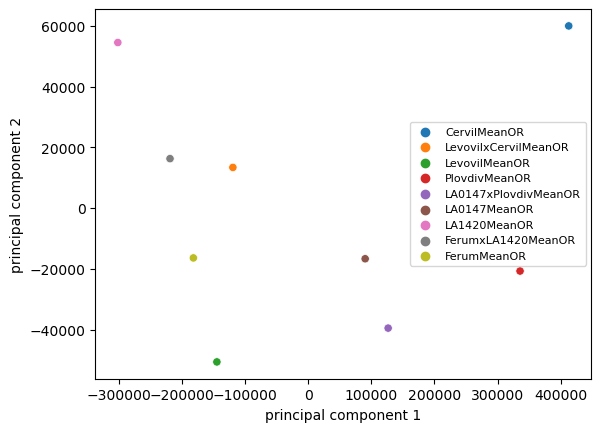

In [65]:
#a graficar OR

ax = sns.scatterplot(data = df_comp_princ_met_OR , x = 'principal component 1' , y = 'principal component 2' , 
hue = 'Genotipo')
sns.color_palette("icefire")
ax.legend(fontsize='8')

Comp1: 89.28528980319423 Comp2: 6.322424422424833


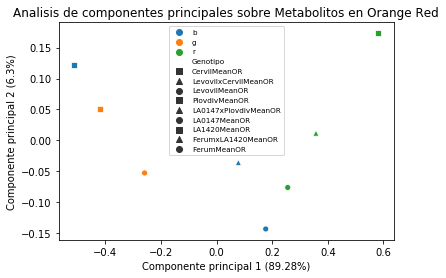

In [50]:
#metabolitos OR noralizados

metab_OR_norm = preprocessing.normalize(metab_OR, axis=0)

pca_metab_OR_norm = PCA(n_components = 2)#creo el objeto con el num de compoenentes deseados

fitting_metab_OR_norm = pca_metab_OR_norm.fit(metab_OR_norm.T)#fiteo la traspuesta del dataset, para pdoer pintar por genotipo

comp_princ_metab_OR_norm = fitting_metab_OR_norm.transform(metab_OR_norm.T)#transformo el dataset.T a la reduccion de dimencional

df_comp_princ_metab_OR_norm = pd.DataFrame(data = comp_princ_metab_OR_norm , columns = ['principal component 1', 'principal component 2'])

df_comp_princ_metab_OR_norm['Genotipo'] = genotipos_met_OR

print(f'Comp1: {pca_metab_OR_norm.explained_variance_ratio_[0]*100} Comp2: {pca_metab_OR_norm.explained_variance_ratio_[1]*100}')

ax = sns.scatterplot(data = df_comp_princ_metab_OR_norm , x = 'principal component 1' , y = 'principal component 2' , 
hue = ['b' , 'b' , 'b' ,'g' , 'g' , 'g' ,'r' , 'r' , 'r'] , style = 'Genotipo' , markers = ["s" , "^" , "o" , "s" , "^" , "o" ,"s" , "^" , "o"])

ax.legend(fontsize='7.3')

ax.set(title='Analisis de componentes principales sobre Metabolitos en Orange Red',xlabel='Componente principal 1 (89.28%)',ylabel='Componente principal 2 (6.3%)')

plt.savefig('/home/mariano/Documents/tomate/A2B2C2023/imagenes_poster/AnalisisComponentesPrincipalesMetabolitosOR.png')

In [59]:
df_comp_princ_metab_OR_norm

,principal component 1,principal component 2,Genotipo
0,-0.511616,0.122473,CervilMeanOR
1,0.078179,-0.035688,LevovilxCervilMeanOR
2,0.176496,-0.143052,LevovilMeanOR
3,-0.420204,0.050987,PlovdivMeanOR
4,-0.257231,-0.051110,LA0147xPlovdivMeanOR
5,-0.259097,-0.052548,LA0147MeanOR
6,0.580725,0.173277,LA1420MeanOR
7,0.357041,0.011699,FerumxLA1420MeanOR
8,0.255709,-0.076037,FerumMeanOR


In [54]:
###########################################################################################################
#ahora queda armar los knn con k=9

In [55]:
#vamos a importar la librarie, para vecinos mas cercanos ,y fitear , y aplicar le modelo

In [56]:
#############################################################no va##########################################

In [57]:
#como hay que pasar a numero las labels(los genotipos), vamos a usar 0 = Cervil, 1 = Levovil , 2 = CervxLevovil
#3 = Ferum , 4 = LA1420 , 5 = FerumxLA1420 , 6 = Plovdiv , 7 = LA0147 , 8 = PlovdivxLA0147 

In [58]:
#arrancamos con el label numerco de todos los datasets, para kmean

In [59]:
genotipo_med_trans = genotipo

In [60]:
genotipo_med_trans2 = [0 , 1 , 3 , 4 , 6 , 7 , 5 , 2 , 8]

In [61]:
genotipo_all

Index(['Cervil_A', 'Cervil_B', 'Levovil_A', 'Levovil_B', 'Ferum_A', 'Ferum_B',
       'LA1420_A', 'LA1420_B', 'Plovdiv_A', 'Plovdiv_B', 'LA0147_A',
       'LA0147_B', 'FerumXLA1420_A', 'FerumXLA1420_B', 'CervilXLevovil_A',
       'CervilXLevovil_B', 'LA0147XPlovdiv_A', 'LA0147XPlovdiv_B'],
      dtype='object')

In [62]:
genotipo_all_trans2 = [0 , 0 ,1 , 1 , 3 , 3 , 4 , 4 , 6 , 6 , 7 , 7 , 5 , 5 , 2 , 2 , 8 , 8]

In [63]:
genotipo_CE

Index(['CervilCEMean', 'LevovilxCervilCEMean', 'LevovilCEMean',
       'PlovdivCEMean', 'LA0147xPlovdivCEMean', 'LA0147CEMean', 'LA1420CEMean',
       'FerumxLA1420CEMean', 'FerumCEMean'],
      dtype='object')

In [64]:
genotipo_prot_CE2 = [0 , 2 , 1 , 6 , 8 , 7 , 4 , 5 , 3]

In [65]:
genotipo_OR

Index(['CervilORMean', 'LevovilxCervilORMean', 'LevovilORMean',
       'PlovdivORMean', 'LA0147xPlovdivORMean', 'LA0147ORMean', 'LA1420ORMean',
       'FerumxLA1420ORMean', 'FerumORMean'],
      dtype='object')

In [66]:
genotipo_prot_OR2 = [0 , 2 , 1 , 6 , 8 , 7 , 4 , 5 , 3]

In [67]:
genotipo_AE_CE

Index(['CervilMeanCE', 'LevovilxCervilMeanCE', 'LevovilMeanCE',
       'PlovdivMeanCE', 'LA0147xPlovdivMeanCE', 'LA0147MeanCE', 'LA1420MeanCE',
       'FerumxLA1420MeanCE', 'FerumMeanCE'],
      dtype='object')

In [68]:
genotipo_AE_CE2 = [0 , 2 , 1 , 6 , 8 , 7 , 4 , 5 , 3]

In [69]:
genotipo_AE_OR

Index(['CervilMeanOR', 'LevovilxCervilMeanOR', 'LevovilMeanOR',
       'PlovdivMeanOR', 'LA0147xPlovdivMeanOR', 'LA0147MeanOR', 'LA1420MeanOR',
       'FerumxLA1420MeanOR', 'FerumMeanOR'],
      dtype='object')

In [70]:
genotipo_AE_OR2 = [0 , 2 , 1 , 6 , 8 , 7 , 4 , 5 , 3]

In [71]:
genotipos_met_CE

Index(['CervilMeanCE', 'LevovilxCervilMeanCE', 'LevovilMeanCE',
       'PlovdivMeanCE', 'LA0147xPlovdivMeanCE', 'LA0147MeanCE', 'LA1420MeanCE',
       'FerumxLA1420MeanCE', 'FerumMeanCE'],
      dtype='object')

In [72]:
genotipos_met_CE2 = [0 , 2 , 1 , 6 , 8 , 7 , 4 , 5 , 3]

In [73]:
genotipos_met_OR

Index(['CervilMeanOR', 'LevovilxCervilMeanOR', 'LevovilMeanOR',
       'PlovdivMeanOR', 'LA0147xPlovdivMeanOR', 'LA0147MeanOR', 'LA1420MeanOR',
       'FerumxLA1420MeanOR', 'FerumMeanOR'],
      dtype='object')

In [74]:
genotipos_met_OR2 = [0 , 2 , 1 , 6 , 8 , 7 , 4 , 5 , 3]

In [75]:
#ahora ya puedo usar kmean

In [76]:
y_med_trans = pd.DataFrame(genotipo_med_trans2 , columns = ['Genotipo'])#las y, para usar como input label

In [77]:
#k medias...
#supongo que puedo graficar los puntos usando los metodos
#cluster_centers_
#y tal vez...
#labels_

In [79]:
from sklearn.cluster import KMeans

k_med_trans = KMeans(n_clusters = 9)

k_med_trans.fit_transform(media_transcriptos.T, y_med_trans.values.ravel())#el .values.ravel es por un error

k_med_trans.cluster_centers_#probaria esta manera de armarlo, a ver si puedo graficar

array([[2.01995351e+01, 3.12596675e+01, 1.28395849e+02, ...,
        6.50276788e-01, 1.34417505e-01, 4.57631377e-01],
       [3.34970840e+01, 3.81525944e+01, 2.04731228e+02, ...,
        2.24818119e-01, 9.27120199e-01, 1.36843712e-01],
       [2.23628410e+01, 3.23671915e+01, 1.35372770e+02, ...,
        1.94429925e-01, 3.36654201e-01, 1.66684742e-01],
       ...,
       [3.78429036e+01, 3.94150683e+01, 2.02485253e+02, ...,
        0.00000000e+00, 5.04332876e-01, 8.77408975e-02],
       [1.40616117e+01, 2.59806387e+01, 1.66770359e+02, ...,
        6.08839773e-02, 8.98131760e-01, 9.74143637e-02],
       [2.13798972e+01, 3.15666006e+01, 1.27440662e+02, ...,
        7.65429428e-01, 1.88896675e-01, 8.17352114e-01]])

In [83]:
centroides.shape

(9, 19248)

In [88]:
clusters = centroides.T

In [89]:
clusters.shape

(19248, 9)

In [86]:
labels = k_med_trans.labels_

In [90]:
labels.shape

(9,)

In [91]:
clusters

array([[2.01995351e+01, 3.34970840e+01, 2.23628410e+01, ...,
        3.78429036e+01, 1.40616117e+01, 2.13798972e+01],
       [3.12596675e+01, 3.81525944e+01, 3.23671915e+01, ...,
        3.94150683e+01, 2.59806387e+01, 3.15666006e+01],
       [1.28395849e+02, 2.04731228e+02, 1.35372770e+02, ...,
        2.02485253e+02, 1.66770359e+02, 1.27440662e+02],
       ...,
       [6.50276788e-01, 2.24818119e-01, 1.94429925e-01, ...,
        0.00000000e+00, 6.08839773e-02, 7.65429428e-01],
       [1.34417505e-01, 9.27120199e-01, 3.36654201e-01, ...,
        5.04332876e-01, 8.98131760e-01, 1.88896675e-01],
       [4.57631377e-01, 1.36843712e-01, 1.66684742e-01, ...,
        8.77408975e-02, 9.74143637e-02, 8.17352114e-01]])

In [93]:
df_clusters = pd.DataFrame(clusters , columns = [0 , 1 , 2 , 3 , 4 , 5 , 6 ,7,8])

In [ ]:
#para graficar vamos a usar algo que vi en internet

/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


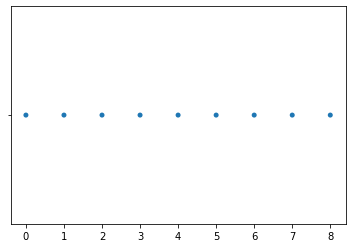

In [87]:
import matplotlib.pyplot as plt

import seaborn as sns


sns.swarmplot(labels)

plt.show()

In [ ]:
###################################3proyecto de grafiacarm que no andaba############################

In [ ]:
#para luego graficar
#import numpy as np
#from matplotlib.colors import ListedColormap

#cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF','#FF0000', '#00FF00','#00AAFF'])

#plt.figure(media_transcriptos.T.values(), predichos_med_trans.values())


In [ ]:
######################################3hasta aca lo quen o va############################################3

In [ ]:
#conviene usar clusteiring gerarquico

In [ ]:
#vamos a probar por hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ac_med_trans = AgglomerativeClustering(n_clusters = 2)

ac_med_trans.fit_predict(media_transcriptos)

In [ ]:
import scipy.cluster.hierarchy as shc
shc.dendrogram(ac_med_trans.fit_predict(media_transcriptos))